# Imoports

In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import nltk

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

# Plotting tools
import matplotlib.pyplot as plt
%matplotlib inline

## Data

In [2]:
df = pd.read_csv('D:\Projects\Jupyter\Github Docs\datasets\preprocessed_word_correct_token.csv', encoding='utf-8')
df.head()

,id,index,name,content,sentence,review_score,review_votes,readability,preprocessed_reviews,wordtoken,correctmapping,ngrams_reviews,ngrams_token,lda_reviews,lda_token
0,275850,1,No Man's Sky,This was my review prior to the 1.1 update ___...,This was my review prior to the 1.1 update ___...,1,1,17.6,this be my review prior to the update nothis g...,"['this', 'be', 'my', 'review', 'prior', 'to', ...","['this', 'be', 'my', 'review', 'prior', 'to', ...",this be my review prior to the update nothin g...,"['review', 'prior', 'update', 'nothin', 'fail'...",review prior update nothin fail miserably anno...,"['review', 'prior', 'update', 'nothin', 'fail'..."
1,275850,2,No Man's Sky,This was my review prior to the 1.1 update ___...,"When the game first came out it had over 200,0...",1,1,6.5,when the game first come out it have over play...,"['when', 'the', 'game', 'first', 'come', 'out'...","['when', 'the', 'game', 'first', 'come', 'out'...",when the game first come out it have over play...,"['first', 'player', 'one', 'point', 'mear']",first come player one point mear,"['first', 'player', 'one', 'point', 'mear']"
2,275850,3,No Man's Sky,This was my review prior to the 1.1 update ___...,If that doesn't prove this game is the biggest...,1,1,5.6,if that do not prove this game be the big scam...,"['if', 'that', 'do', 'not', 'prove', 'this', '...","['if', 'that', 'do', 'not', 'prove', 'this', '...",if that do not prove this game be the big scam...,"['prove', 'this_game', 'big', 'scam', 'know']",prove big scam know,"['prove', 'big', 'scam', 'know']"
3,275850,4,No Man's Sky,This was my review prior to the 1.1 update ___...,The devs completely lied about countless featu...,1,1,8.7,the developer completely lie about countless f...,"['the', 'developer', 'completely', 'lie', 'abo...","['the', 'developer', 'completely', 'lie', 'abo...",the developer completely lie about countless f...,"['the_developer', 'completely', 'lie_about', '...",developer completely lie countless feature meant,"['developer', 'completely', 'lie', 'countless'..."
4,275850,5,No Man's Sky,This was my review prior to the 1.1 update ___...,______________________________________________...,1,1,29.1,i clearly have very strong feel about the game...,"['clearly', 'have', 'very', 'strong', 'feel', ...","['clearly', 'have', 'very', 'strong', 'feel', ...",clearly have very strong feel about the game a...,"['clearly', 'strong', 'feel', 'play', 'hour', ...",clearly strong feel play hour hello games rele...,"['clearly', 'strong', 'feel', 'play_hour', 'he..."


In [3]:
df=df[:500]

In [4]:
eval(df['lda_token'][0])

['review',
 'prior',
 'update',
 'nothin',
 'fail',
 'miserably',
 'annoyed',
 'stuck',
 'garbage',
 'library',
 'completely',
 'terrible',
 'likely',
 'never',
 'play']

In [5]:
def convert(s):
    s = eval(s)
    s = ' '.join(s)
    return s
df['lda_token'] = df['lda_token'].apply(convert)

In [6]:
data = df.lda_token.values.tolist()
data[:3]

['review prior update nothin fail miserably annoyed stuck garbage library completely terrible likely never play',
 'first player one point mear',
 'prove big scam know']

# NMF

## NMF (TfIDFcorpus)

In [7]:
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from gensim.models import CoherenceModel, TfidfModel, LsiModel

In [8]:
documents = df['wordtoken'].values

In [9]:
texts = [[word for word in str(document).split()] for document in documents]
id2word = corpora.Dictionary(texts)
dictionary =id2word

In [10]:
tfidf = TfidfModel(dictionary=id2word)
corpus = [
    dictionary.doc2bow(document)
    for document
    in texts
]
corpus_tfidf = list(tfidf[corpus])

## Coherence

In [11]:
from gensim.models.nmf import Nmf
# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(5, 40 + 1, 5))

### C_V

In [12]:
from gensim.models.nmf import Nmf

# Create a list of the topic numbers we want to try

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus_tfidf,
        num_topics=num,
        id2word=id2word,
        chunksize=200,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=50,
        w_stop_condition=0.0001,
        h_max_iter=50,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=50
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=id2word,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))


In [13]:
best_num_topics_cv = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

print(best_num_topics_cv)

5


In [14]:
coherence_scores

[0.45167, 0.37939, 0.35815, 0.36371, 0.37832, 0.37005, 0.3869, 0.35815]

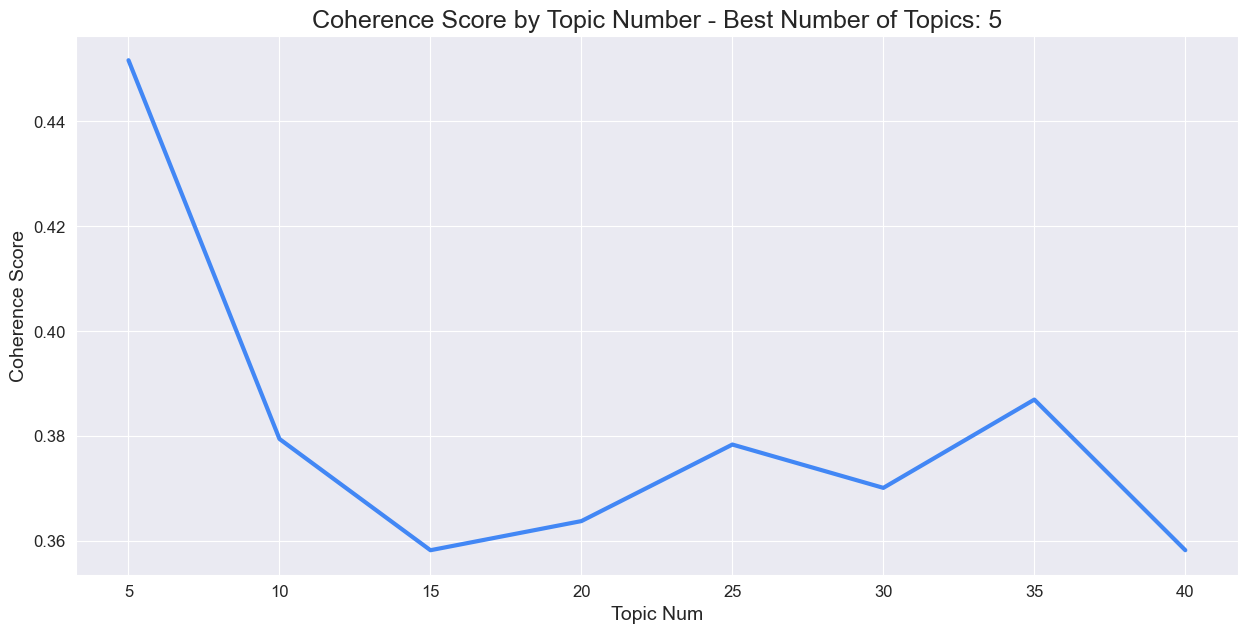

In [15]:
# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics_cv), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

# file_name = 'c_score'

# fig.savefig(
#     file_path + file_name + '.png',
#     dpi=fig.dpi,
#     bbox_inches='tight'
# )

plt.show()

### npmi 

In [16]:
coherence_scores_npmi = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus_tfidf,
        num_topics=num,
        id2word=id2word,
        chunksize=200,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=50,
        w_stop_condition=0.0001,
        h_max_iter=50,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=50
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=id2word,
        coherence='c_npmi'
    )
    
    coherence_scores_npmi.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores__npmi = list(zip(topic_nums, coherence_scores_npmi))
best_num_topics_npmi = sorted(scores__npmi, key=itemgetter(1), reverse=True)[0][0]

print(best_num_topics_npmi)

5


In [17]:
coherence_scores_npmi

[-0.07289,
 -0.14722,
 -0.17751,
 -0.20421,
 -0.22901,
 -0.22459,
 -0.23698,
 -0.24756]

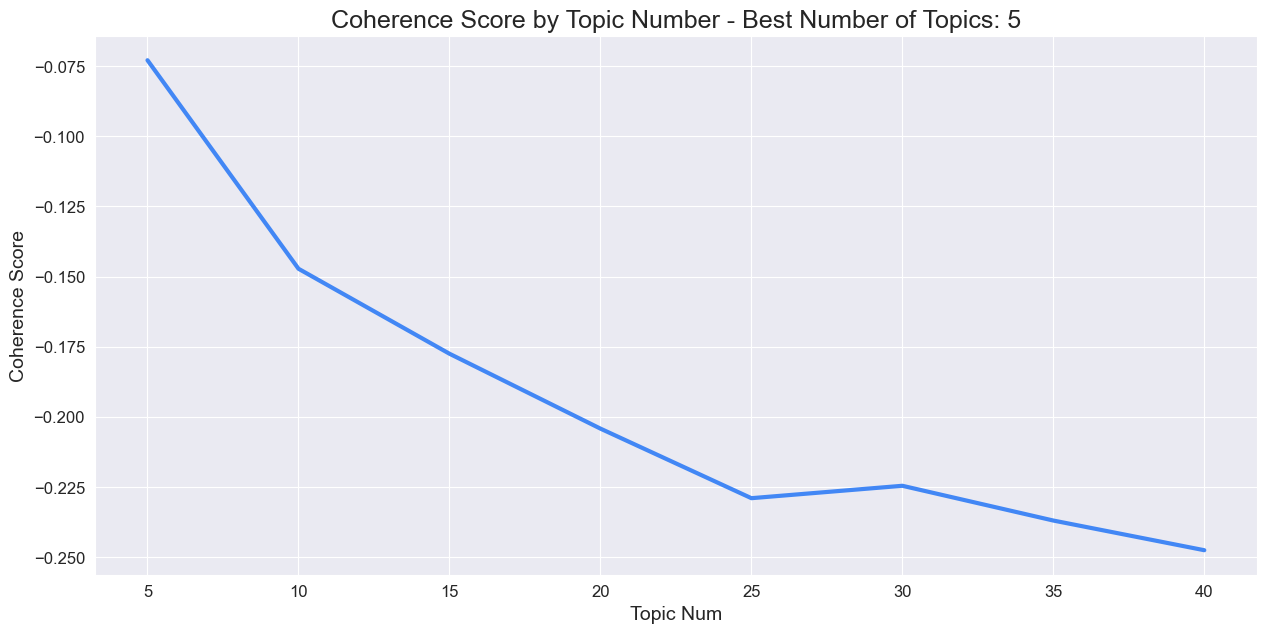

In [18]:
# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores_npmi,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics_npmi), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

# file_name = 'c_score'

# fig.savefig(
#     file_path + file_name + '.png',
#     dpi=fig.dpi,
#     bbox_inches='tight'
# )

plt.show()

### u_mass

In [19]:
coherence_scores_umass = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus_tfidf,
        num_topics=num,
        id2word=id2word,
        chunksize=200,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=50,
        w_stop_condition=0.0001,
        h_max_iter=50,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=50
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=id2word,
        coherence='u_mass'
    )
    
    coherence_scores_umass.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores_umass = list(zip(topic_nums, coherence_scores_umass))
best_num_topics_umass = sorted(scores_umass, key=itemgetter(1), reverse=True)[0][0]

print(best_num_topics_umass)

5


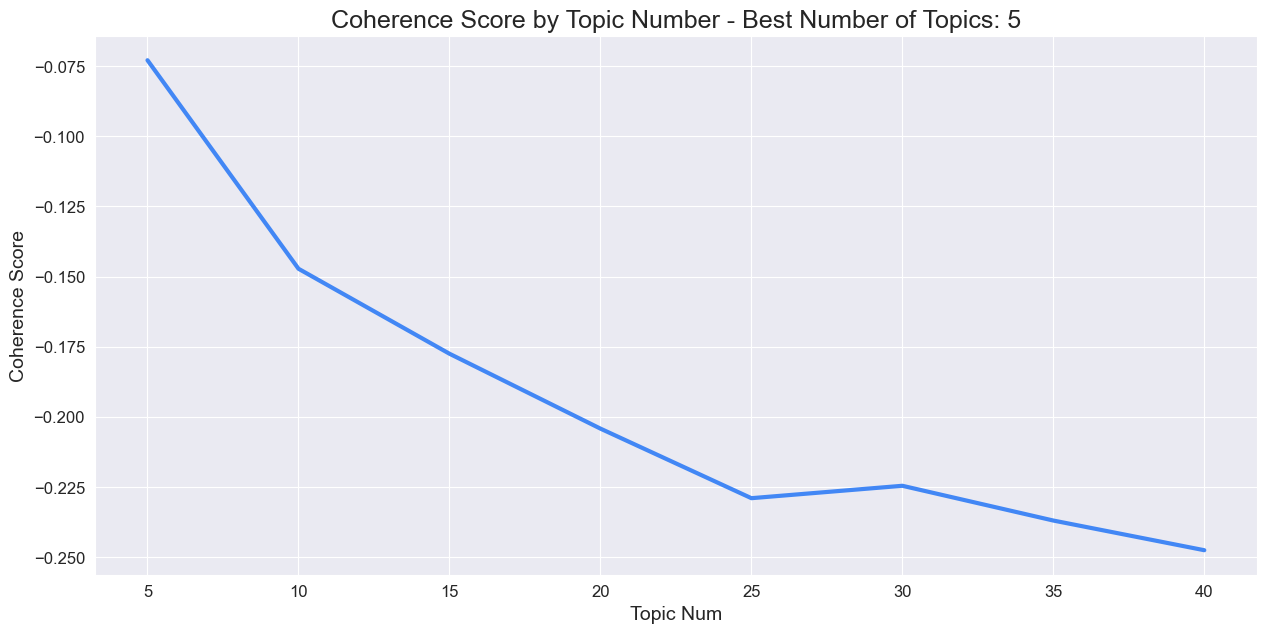

In [20]:
# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores_npmi,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics_umass), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

# file_name = 'c_score'

# fig.savefig(
#     file_path + file_name + '.png',
#     dpi=fig.dpi,
#     bbox_inches='tight'
# )

plt.show()

In [21]:
coherence_scores_umass

[-3.25825,
 -5.99023,
 -7.79609,
 -8.39221,
 -10.01229,
 -10.1622,
 -10.8554,
 -11.4167]

### c_uci

In [22]:
coherence_scores_uci = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus_tfidf,
        num_topics=num,
        id2word=id2word,
        chunksize=200,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=50,
        w_stop_condition=0.0001,
        h_max_iter=50,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=50
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=id2word,
        coherence='c_uci'
    )
    
    coherence_scores_uci.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores_uci = list(zip(topic_nums, coherence_scores_uci))
best_num_topics_uci = sorted(scores_uci, key=itemgetter(1), reverse=True)[0][0]

print(best_num_topics_uci)

5


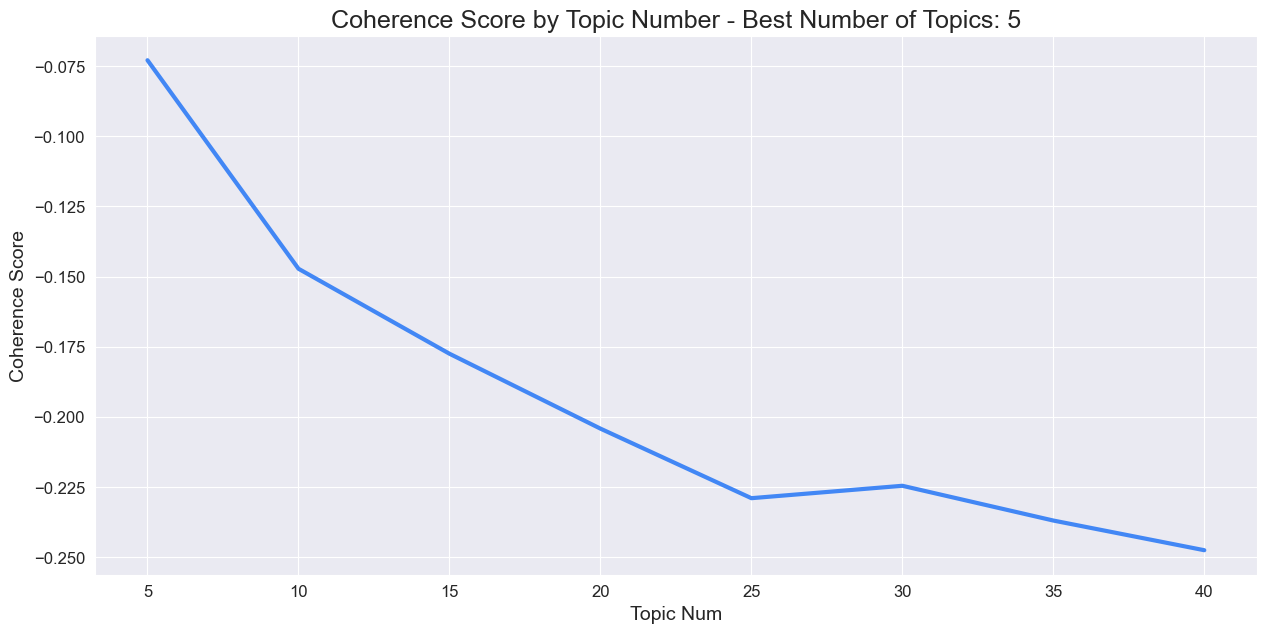

In [23]:
# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores_npmi,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics_uci), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

# file_name = 'c_score'

# fig.savefig(
#     file_path + file_name + '.png',
#     dpi=fig.dpi,
#     bbox_inches='tight'
# )

plt.show()

In [24]:
coherence_scores_uci

[-2.21463, -4.74194, -5.82906, -6.68078, -7.462, -7.49308, -8.00723, -8.34354]

## Best NMF

In [25]:
%%time

nmf_cv = Nmf(
    corpus=corpus_tfidf,
    num_topics=best_num_topics_cv,
    id2word=id2word,
    chunksize=2000,
    passes=5,
    kappa=.1,
    minimum_probability=0.01,
    w_max_iter=300,
    w_stop_condition=0.0001,
    h_max_iter=100,
    h_stop_condition=0.001,
    eval_every=10,
    normalize=True,
    random_state=42
)
nmf_cv.show_topics(num_words=10, log=False, formatted=True, normalize=None)

CPU times: total: 1.5 s
Wall time: 380 ms


[(0,
  '0.016*"[\'this\'," + 0.013*"\'game\']" + 0.013*"\'the\'," + 0.012*"\'game\'," + 0.012*"\'update\'," + 0.012*"\'say\'," + 0.011*"\'at\'," + 0.010*"\'should\'," + 0.010*"\'do\'," + 0.010*"\'have\',"'),
 (1,
  '0.022*"\'to\'," + 0.020*"\'like\'," + 0.019*"\'you\'," + 0.016*"\'in\'," + 0.014*"\'not\'," + 0.013*"\'make\'," + 0.012*"\'this\'," + 0.011*"\'if\'," + 0.011*"\'up\'," + 0.011*"\'have\',"'),
 (2,
  '0.017*"\'the\'," + 0.013*"\'you\'," + 0.013*"\'really\'," + 0.012*"\'game\'," + 0.011*"\'for\'," + 0.011*"\'very\'," + 0.010*"\'still\'," + 0.010*"\'it\'," + 0.010*"\'update\'," + 0.009*"\'with\',"'),
 (3,
  '0.016*"\'more\'," + 0.016*"\'the\'," + 0.012*"\'will\'," + 0.012*"\'of\'," + 0.012*"\'now\'," + 0.011*"\'no\'," + 0.010*"\'that\'," + 0.010*"\'time\'," + 0.010*"\'man\'," + 0.009*"\'to\',"'),
 (4,
  '0.022*"\'for\'," + 0.022*"\'what\'," + 0.019*"\'it\']" + 0.016*"[\'the\'," + 0.015*"\'do\'," + 0.014*"\'and\'," + 0.014*"\'be\'," + 0.014*"\'it\'," + 0.013*"[\'it\'," + 0.013*"

In [26]:
%%time

nmf_npmi = Nmf(
    corpus=corpus_tfidf,
    num_topics=best_num_topics_npmi,
    id2word=id2word,
    chunksize=2000,
    passes=5,
    kappa=.1,
    minimum_probability=0.01,
    w_max_iter=300,
    w_stop_condition=0.0001,
    h_max_iter=100,
    h_stop_condition=0.001,
    eval_every=10,
    normalize=True,
    random_state=42
)
nmf_npmi.show_topics(num_words=10, log=False, formatted=True, normalize=None)

CPU times: total: 1.56 s
Wall time: 389 ms


[(0,
  '0.016*"[\'this\'," + 0.013*"\'game\']" + 0.013*"\'the\'," + 0.012*"\'game\'," + 0.012*"\'update\'," + 0.012*"\'say\'," + 0.011*"\'at\'," + 0.010*"\'should\'," + 0.010*"\'do\'," + 0.010*"\'have\',"'),
 (1,
  '0.022*"\'to\'," + 0.020*"\'like\'," + 0.019*"\'you\'," + 0.016*"\'in\'," + 0.014*"\'not\'," + 0.013*"\'make\'," + 0.012*"\'this\'," + 0.011*"\'if\'," + 0.011*"\'up\'," + 0.011*"\'have\',"'),
 (2,
  '0.017*"\'the\'," + 0.013*"\'you\'," + 0.013*"\'really\'," + 0.012*"\'game\'," + 0.011*"\'for\'," + 0.011*"\'very\'," + 0.010*"\'still\'," + 0.010*"\'it\'," + 0.010*"\'update\'," + 0.009*"\'with\',"'),
 (3,
  '0.016*"\'more\'," + 0.016*"\'the\'," + 0.012*"\'will\'," + 0.012*"\'of\'," + 0.012*"\'now\'," + 0.011*"\'no\'," + 0.010*"\'that\'," + 0.010*"\'time\'," + 0.010*"\'man\'," + 0.009*"\'to\',"'),
 (4,
  '0.022*"\'for\'," + 0.022*"\'what\'," + 0.019*"\'it\']" + 0.016*"[\'the\'," + 0.015*"\'do\'," + 0.014*"\'and\'," + 0.014*"\'be\'," + 0.014*"\'it\'," + 0.013*"[\'it\'," + 0.013*"

In [27]:
%%time

nmf_umass = Nmf(
    corpus=corpus_tfidf,
    num_topics=best_num_topics_umass,
    id2word=id2word,
    chunksize=2000,
    passes=5,
    kappa=.1,
    minimum_probability=0.01,
    w_max_iter=300,
    w_stop_condition=0.0001,
    h_max_iter=100,
    h_stop_condition=0.001,
    eval_every=10,
    normalize=True,
    random_state=42
)
nmf_umass.show_topics(num_words=10, log=False, formatted=True, normalize=None)

CPU times: total: 1.36 s
Wall time: 348 ms


[(0,
  '0.016*"[\'this\'," + 0.013*"\'game\']" + 0.013*"\'the\'," + 0.012*"\'game\'," + 0.012*"\'update\'," + 0.012*"\'say\'," + 0.011*"\'at\'," + 0.010*"\'should\'," + 0.010*"\'do\'," + 0.010*"\'have\',"'),
 (1,
  '0.022*"\'to\'," + 0.020*"\'like\'," + 0.019*"\'you\'," + 0.016*"\'in\'," + 0.014*"\'not\'," + 0.013*"\'make\'," + 0.012*"\'this\'," + 0.011*"\'if\'," + 0.011*"\'up\'," + 0.011*"\'have\',"'),
 (2,
  '0.017*"\'the\'," + 0.013*"\'you\'," + 0.013*"\'really\'," + 0.012*"\'game\'," + 0.011*"\'for\'," + 0.011*"\'very\'," + 0.010*"\'still\'," + 0.010*"\'it\'," + 0.010*"\'update\'," + 0.009*"\'with\',"'),
 (3,
  '0.016*"\'more\'," + 0.016*"\'the\'," + 0.012*"\'will\'," + 0.012*"\'of\'," + 0.012*"\'now\'," + 0.011*"\'no\'," + 0.010*"\'that\'," + 0.010*"\'time\'," + 0.010*"\'man\'," + 0.009*"\'to\',"'),
 (4,
  '0.022*"\'for\'," + 0.022*"\'what\'," + 0.019*"\'it\']" + 0.016*"[\'the\'," + 0.015*"\'do\'," + 0.014*"\'and\'," + 0.014*"\'be\'," + 0.014*"\'it\'," + 0.013*"[\'it\'," + 0.013*"

In [28]:
%%time

nmf_uci = Nmf(
    corpus=corpus_tfidf,
    num_topics=best_num_topics_uci,
    id2word=id2word,
    chunksize=2000,
    passes=5,
    kappa=.1,
    minimum_probability=0.01,
    w_max_iter=300,
    w_stop_condition=0.0001,
    h_max_iter=100,
    h_stop_condition=0.001,
    eval_every=10,
    normalize=True,
    random_state=42
)
nmf_uci.show_topics(num_words=10, log=False, formatted=True, normalize=None)

CPU times: total: 1.42 s
Wall time: 350 ms


[(0,
  '0.016*"[\'this\'," + 0.013*"\'game\']" + 0.013*"\'the\'," + 0.012*"\'game\'," + 0.012*"\'update\'," + 0.012*"\'say\'," + 0.011*"\'at\'," + 0.010*"\'should\'," + 0.010*"\'do\'," + 0.010*"\'have\',"'),
 (1,
  '0.022*"\'to\'," + 0.020*"\'like\'," + 0.019*"\'you\'," + 0.016*"\'in\'," + 0.014*"\'not\'," + 0.013*"\'make\'," + 0.012*"\'this\'," + 0.011*"\'if\'," + 0.011*"\'up\'," + 0.011*"\'have\',"'),
 (2,
  '0.017*"\'the\'," + 0.013*"\'you\'," + 0.013*"\'really\'," + 0.012*"\'game\'," + 0.011*"\'for\'," + 0.011*"\'very\'," + 0.010*"\'still\'," + 0.010*"\'it\'," + 0.010*"\'update\'," + 0.009*"\'with\',"'),
 (3,
  '0.016*"\'more\'," + 0.016*"\'the\'," + 0.012*"\'will\'," + 0.012*"\'of\'," + 0.012*"\'now\'," + 0.011*"\'no\'," + 0.010*"\'that\'," + 0.010*"\'time\'," + 0.010*"\'man\'," + 0.009*"\'to\',"'),
 (4,
  '0.022*"\'for\'," + 0.022*"\'what\'," + 0.019*"\'it\']" + 0.016*"[\'the\'," + 0.015*"\'do\'," + 0.014*"\'and\'," + 0.014*"\'be\'," + 0.014*"\'it\'," + 0.013*"[\'it\'," + 0.013*"